<a href="https://colab.research.google.com/github/PurinYun/MainQuest3_R.S.P/blob/main/MainQuest_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 : 가위바위보 분류기를 만들자

## 1. 실습환경 및 데이터 준비

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.15.0
1.23.5


In [2]:
# 디렉토리 만들기
! mkdir -p ~/aiffel/rock_scissor_paper/scissor
! mkdir -p ~/aiffel/rock_scissor_paper/rock
! mkdir -p ~/aiffel/rock_scissor_paper/paper

! ls -l ~/aiffel/rock_scissor_paper

total 12
drwxr-xr-x 2 root root 4096 Dec 15 08:36 paper
drwxr-xr-x 2 root root 4096 Dec 15 08:36 rock
drwxr-xr-x 2 root root 4096 Dec 15 08:36 scissor


In [3]:
# 원하는 디렉토리로 이동 =3
! cd  ~/aiffel/rock_scissor_paper/rock

# 압축 해제 명령어 : unzip <파일명>.zip
! unzip rock.zip

# 가위, 보에 대해서도 똑같이 실행!
! cd  ~/aiffel/rock_scissor_paper/scissor
! unzip scissor.zip

! cd  ~/aiffel/rock_scissor_paper/paper
! unzip paper.zip

unzip:  cannot find or open rock.zip, rock.zip.zip or rock.zip.ZIP.
unzip:  cannot find or open scissor.zip, scissor.zip.zip or scissor.zip.ZIP.
unzip:  cannot find or open paper.zip, paper.zip.zip or paper.zip.ZIP.


## 2. 다운받은 데이터 크기 알아보기

In [4]:
from PIL import Image

file_path = "~/aiffel/rock_scissor_paper/paper"

image = Image.open(file_path)
image_size = image.size
print(f"이미지 크기: {image_size}")

FileNotFoundError: ignored

In [5]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


이제 가위 이미지를 불러와서 28x28 사이즈로 변경할 겁니다.  

아래 코드를 실행해보세요. 이미지의 크기가 28x28 로 바뀌었나요?

In [6]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

0  images to be resized.
0  images resized.
가위 이미지 resize 완료!


In [7]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")


	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

0  images to be resized.
0  images resized.


In [8]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")


	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

0  images to be resized.
0  images resized.


(6) 숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었던 것 기억하시죠? 여러분들이 아직 코딩에 익숙하지 않을 수 있으므로,
가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만들어 드릴 거예요.

이 코드를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가,
우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용하실 수 있을 겁니다.

load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다.
여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다.
숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠?
가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것입니다.

In [9]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


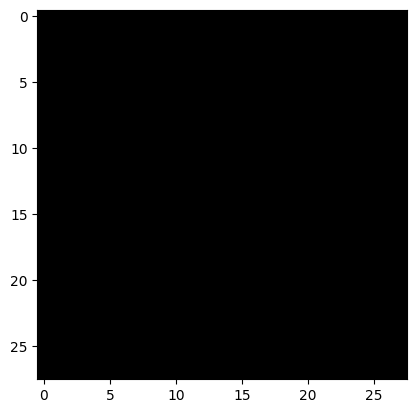

In [10]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np